<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Section5.2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Artificial Neural Network###

![alt text](https://docs.google.com/uc?export=download&id=1oWrlu3M05rP8GzEWU23EgTZpDiFj2Mop)



*   Input layer ( $h^{0}$): $h^{0}(x) = x$.
*  Hidden layer ($\{h^{l}\}_{l = 1}^{L-1}$);
* Output layer ($h^{L}$).

\begin{eqnarray*}
z^{l+1} &=& {\color{blue}W^{l}} h^{l} + {\color{blue}b^{l}},\\
h^{l+1} &=& {\color{red} \sigma}(z^{l+1}),
\end{eqnarray*}
where ${\color{red}\sigma}$ is an* activation function*, which is usually non-linear, e.g. the sigmoid function $\sigma(x) = \frac{1}{1+e^{-x}}$. The parameter set ${\color{blue}\theta} = (W^{l}, b^{l})_{l =1}^{L}$}.


###ANN Classification###
The input $x$ is a multi-dimensional vector; 

The ouput $y$ is a one-hot respresenation of the class. 


The number of neurons in the output layer is the total number of classes. 

The $j^{th}$ neurons in the output layer represents the probability of the output(label) being class $j$.  

 The **cross entropy **loss function is defined as follows:

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N}\sum_{i =1}^{N} \sum_{k} \mathbb{1}( y_{i}=\text{ class }k) \log(p(y_{i} =\text{ class }k \vert x_{i})) 
\end{eqnarray*}

Note: The cross entropy between two probability distributions $p$ and $q$ is defined as 
\begin{eqnarray*}
H(p, q) =- \sum_{x} p(x)\log(q(x)).
\end{eqnarray*}

$L(\theta \vert \mathcal{D}) $ can be reformulated as 

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N} \langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle 
\end{eqnarray*}


#Pipelines of Supervised Learning Algorithms# 

The piplelines of the supervised learning algorithms are summarized as follows:

1.   Import Datasets;
2.   Take a look at the dataset (Statistical Analysis/Visualization);
3.    Pre-process the dataset to prepare for the training process (normalization/reshape data);
4.    Train a model;
5.    Validate a model;
6.    Cross Validation. 


** We will apply the shallow neural network to the MNIST dataset as a concrete example to go through the pipelines of supervised learning algorithm.**

Problem: Build an algorithm to identify the digit label from the handwritten image using the MNIST dataset. 

![alt text](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

## Import Dataset##

In [0]:
# Import the MNIST Dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


[keras link](https://keras.io/datasets/)

##Analyse Dataset##

In [0]:
import numpy as np
print(type(x_train))
print(type(y_train))
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
print('One sample of x_train is')
print(x_train[0])
print('The output labels in the training set is')
print(y_train)

One sample of x_train is
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

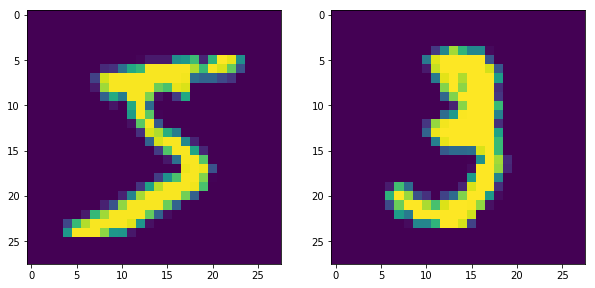

In [0]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.grid(b = False)
plt.imshow(x_train[0, :, :])
plt.subplot(1, 2, 2)
plt.imshow(x_train[10,:,:])
plt.grid(b = False)

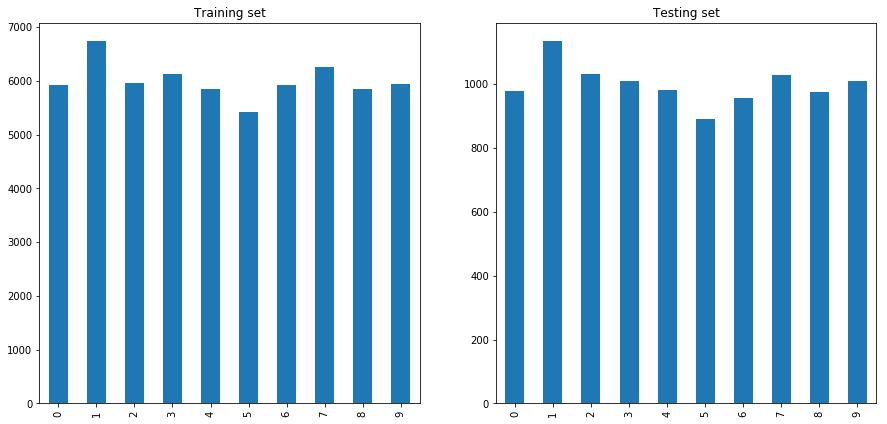

In [0]:
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Input: y - one diemsional integer valued np array
# Output: count_y - pd Series type - the counts of possible values in y 
# Function  Plot_Count_info: Plot count_y 
def Plot_Count_info(y):
  y_pd = pd.Series(y)
  count_y = y_pd.value_counts().sort_index()
  count_y.plot(kind='bar');
  return count_y
 
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
count_y_train = Plot_Count_info(y_train)
plt.title('Training set');
plt.subplot( 1, 2, 2)
count_y_test =Plot_Count_info(y_test)
plt.title('Testing set');

In [0]:
num_classes = count_y_test.size
print('num of digit classes = ', num_classes)

num of digit classes =  10


## Pre-process the Datasets##

In [0]:
import keras
import numpy as np
# convert class vectors to one hot vector matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

[n_samples_train, width, height] = np.shape(x_train)
[n_samples_test, width, height] = np.shape(x_test)

X_train = x_train.reshape([n_samples_train, width*height])
X_test =x_test.reshape( [n_samples_test, width*height])

print('The sample input(x) is ')
print( x_train[0])
print('The sample input(X) is ')
print(X_train[0])

print('The output label (y) is ')
print(y_train[0])
print('The output label (Y) is ')
print(Y_train[0])

In [0]:
# normalize the datasets 
X_train = X_train/np.amax(X_train)
X_test = X_test/np.amax(X_train)

print('The normalized input (X) is ', X_train[0])

## Train and Validate a model##

Quick summary of the training and validation process of the supervised learning. 

1.   Data (Input, Output):  $\mathcal{D} = \{(x_{i}, y_{i})\}_{i = 1}^{N}$. 
2.   Model: $y = {\color{blue}f_{\theta}}(x) + \varepsilon, ~~~ \forall x \in \mathbb{R}^{d}$.
3.   Loss Function: $L({\color{blue}\theta} \vert \mathcal{D}) \rightarrow $Minimize
4.   Optimization: ${\color{blue}\theta^{*}}= \min_{\theta} (L({\color{blue}\theta} \vert \mathcal{D}))$
5.   Prediction.
6.   Validation: Compute the metric of the fitting performance in the test set. 







Let us starat with two-layer (Shallow) Neural Network.

![Shallow Neural Network](https://docs.google.com/uc?export=download&id=1swriJo3eeBNkWXmieRWtTig0jU61oG9H)



The MNIST Example: Digit Classfication


1.   Data: (Input, Output) $= (x, y), x \in \mathbb{R}^{784}, y $ is a categorical variable (10 classes). 
2.   Model: Shallow Neural network using     
 *  relu activation function, i.e. $a(x) = \max(x, 0)$ in the hidden layer

 *    and softmax activation function, i.e. $b(x)_j = \frac{e^{x_{j}}}{\sum_{k} e^{x_{k}}}$ in the output layer

3.   Loss Function: Cross Entropy
4.   Optmization: Stochastic Graident Descent
5.   Prediction
6.   Validation: Choose the accuracy of label prediction as metric 




In [0]:
import time
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

  
def shallow_NN_model(n_hidden_neurons):
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    model.add(Dense(n_hidden_neurons, activation = 'relu', input_dim=784))
    model.add(Dense(10, activation = 'softmax'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model
    
epochs = 100
batch  = 256
n_hidden_neurons = 50
model = shallow_NN_model(n_hidden_neurons)
hist1 = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch, validation_data=(X_test, Y_test), verbose=2)

In [0]:
print(hist1.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [0]:
from google.colab import  files

In [0]:
def plot_hist_loss(hist):
  plt.figure()
  plt.plot(hist.history['loss'], 'b', linewidth=1.5)
  plt.plot(hist.history['val_loss'], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  #ax = plt.gca()
  #ax.spines['top'].set_linewidth(1.5)
  #ax.spines['bottom'].set_linewidth(1.5)
  #ax.spines['left'].set_linewidth(1.5)
  #ax.spines['right'].set_linewidth(1.5)
  plt.savefig('MINST_ShallowNN_Loss.png', dpi=1000)
  files.download('MINST_ShallowNN_Loss.png')
  

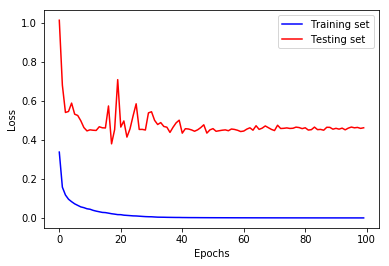

In [0]:
plot_hist_loss(hist1)

In [0]:
def plot_hist_accuracy(hist):
  plt.plot(hist.history['acc'], 'b', linewidth = 1.5)
  plt.plot(hist.history['val_acc'], 'r', linewidth = 1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.savefig('MINST_ShallowNN_Accuracy.png', dpi=1000)
  files.download('MINST_ShallowNN_Accuracy.png')

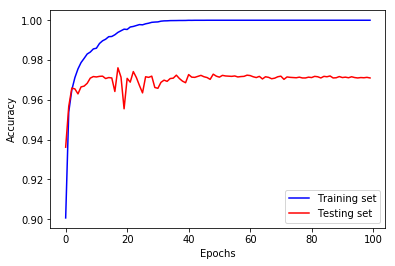

In [0]:
plot_hist_accuracy(hist1)

**Assess the performance of a fitted model**

There are various measurements of the performance of the fitted models in classification problems.
*   Loss function and the accuracy;
*   Confusion matrix. 



In [0]:
score1 =  model.evaluate(X_test, Y_test)
print(model.metrics_names)
print('Test ' + model.metrics_names[0] , score1[0])
print('Test '+ model.metrics_names[1] , score1[1])

10000/10000 [==============================] - 0s 38us/step
['loss', 'acc']
Test loss 0.46302727451694625
Test acc 0.971


In [0]:
from sklearn.metrics import confusion_matrix

Y_test_prob_pred = model.predict(X_test)
Y_test_class_pred = model.predict_classes(X_test)
print(Y_test_class_pred )
print(y_test)
cm = confusion_matrix( y_test, Y_test_class_pred )
labels = np.arange(10);

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


Confusion matrix, without normalization
[[ 968    0    2    1    1    1    2    2    1    2]
 [   0 1124    2    3    0    0    1    3    2    0]
 [   6    1  987   12    5    0    3   13    4    1]
 [   0    1    1  995    0    0    0    5    1    7]
 [   2    0    5    0  950    0    1    6    2   16]
 [   3    1    0   15    1  853    8    3    6    2]
 [   3    4    1    1    4    2  942    0    1    0]
 [   1    4    4    8    1    1    0 1002    0    7]
 [   7    0    8   22    1    2    4    9  915    6]
 [   2    4    1    9    7    1    0   10    1  974]]
Normalized confusion matrix
[[9.87755102e-01 0.00000000e+00 2.04081633e-03 1.02040816e-03
  1.02040816e-03 1.02040816e-03 2.04081633e-03 2.04081633e-03
  1.02040816e-03 2.04081633e-03]
 [0.00000000e+00 9.90308370e-01 1.76211454e-03 2.64317181e-03
  0.00000000e+00 0.00000000e+00 8.81057269e-04 2.64317181e-03
  1.76211454e-03 0.00000000e+00]
 [5.81395349e-03 9.68992248e-04 9.56395349e-01 1.16279070e-02
  4.84496124e-03 0.000000

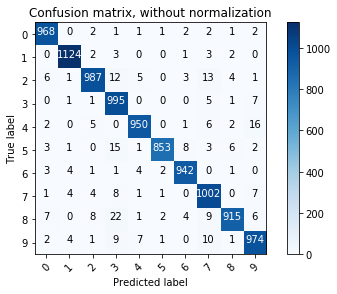

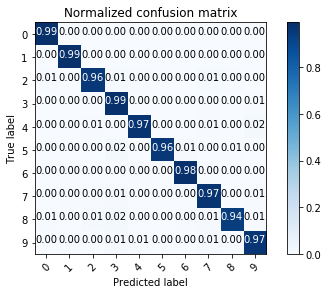

In [0]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b = 0)

## The code for the function plot_confusion_matrix() is attributed to http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), normalize=True, title='Normalized confusion matrix')


**Visualize the wrong labelled samples**

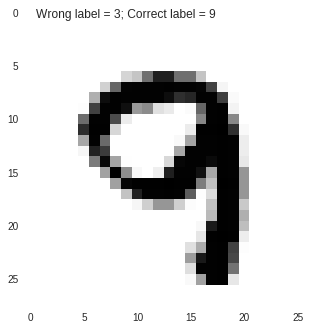

In [0]:
res = Y_test_class_pred -y_test # residuals - (the estimated label - the actual label)
wrong_sample_index = np.nonzero(res)[0];
#print(wrong_sample_index)

# Visualize some sample of all wrong labelled data in the testing set
index = wrong_sample_index[6]
wrong_samples_images = x_test[index]
wrong_samples_true_lebels = y_test[index]
wrong_samples_pred_lebels = Y_test_class_pred[index]
plt.imshow(wrong_samples_images)
plt.grid(b = False)
plt.text(0.5, 0.5, 'Wrong label = ' + str(wrong_samples_pred_lebels) +'; Correct label = ' + str(wrong_samples_true_lebels));


##Cross Validation##

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

estimator = KerasClassifier(build_fn=shallow_NN_model, n_hidden_neurons = 50, epochs=20, batch_size=batch, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, scoring='accuracy')
print(np.shape(y_train))
print('Cross Validation: Accuracy')
print("%.2f%% (+/- %.2f%%)" % (results.mean(), results.std()))

## Parameter Tuning##

[Use Keras Deep Learning Models with Scikit-Learn in Python by Jason Brownlee](https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/)

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# grid search epochs, batch size and optimizer
epochs = [100]
n_hidden_neurons = [10, 50]
batch_size = [128, 256]
param_grid = dict( n_hidden_neurons = n_hidden_neurons, batch_size = batch_size, epochs = epochs)
estimator = KerasClassifier(build_fn=shallow_NN_model,  verbose=0)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring = 'accuracy')
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Compiling Model ... 
Model compield in 0.07994675636291504 seconds
Compiling Model ... 
Model compield in 0.07367706298828125 seconds
Compiling Model ... 
Model compield in 0.07584404945373535 seconds
Compiling Model ... 
Model compield in 0.07443547248840332 seconds
Compiling Model ... 
Model compield in 0.07407498359680176 seconds
Compiling Model ... 
Model compield in 0.07345867156982422 seconds
Compiling Model ... 
Model compield in 0.07248997688293457 seconds
Compiling Model ... 
Model compield in 0.07668375968933105 seconds
Compiling Model ... 
Model compield in 0.07355213165283203 seconds
Compiling Model ... 
Model compield in 0.07327055931091309 seconds
Compiling Model ... 
Model compield in 0.07344603538513184 seconds
Compiling Model ... 
Model compield in 0.07512140274047852 seconds
Compiling Model ... 
Model compield in 0.07410264015197754 seconds
Best: 0.970567 using {'batch_size': 128, 'epochs': 100, 'n_hidden_neurons': 50}
0.917467 (0.002779) with: {'batch_size': 128, 'ep

#From Shallow NN to Deep NN##

![alt text](https://docs.google.com/uc?export=download&id=1oWrlu3M05rP8GzEWU23EgTZpDiFj2Mop)




## Multi-Layer Neural Network##

In [0]:
import time
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization


def deeper_model(n_hidden_neurons, n_hidden_layers):
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    model.add(Dense(n_hidden_neurons, activation = 'relu', input_dim=784))
    if n_hidden_layers >1:
      for i in range(n_hidden_layers-1):
        model.add(Dense(n_hidden_neurons, activation = 'relu'))
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model

Compiling Model ... 
Model compield in 0.08750700950622559 seconds
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________
None


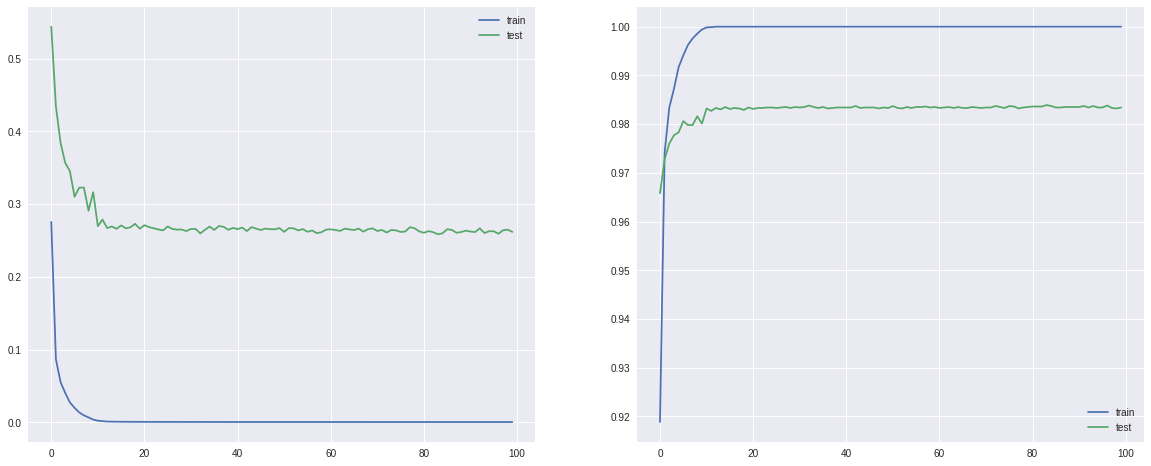

In [0]:
n_hidden_neurons = 500
n_hidden_layers = 2
deeper_model1 = deeper_model(n_hidden_neurons, n_hidden_layers)
print(deeper_model1.summary())
epochs = 100
hist_deeper_model = deeper_model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch, validation_data=(X_test, Y_test), verbose=0)
plot_hist(hist_deeper_model)

##Important Aspects about Optimization##




The sucess of the optimization scheme depends on several aspects:


*   Data - Normalization.
*   Optimizor
*   Parameter initialization 

###Normalization###

[Keras link](https://keras.io/layers/normalization/)

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

###Optimizor###

Optmizor


*   Method, e.g. SGD, Adam...
*   Related Parameters, .e.g batch_size, epochs...



[Keras Link](https://keras.io/optimizers/)

Popular optimazation methods include:

1.   Stochastic Grid Descent(SGD);
2.   Adaptive Gradient Algorithm (AdaGrad);
3.   Root Mean Square Propagation (RMSProp)

More information can be found in [Gentle Introduction to the Adam Optimization Algorithm for Deep Learning](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)




###Weight initialization ###

[Keras Link](https://keras.io/initializers/)

## Overfitting Issues##

### Dropout###

[Dropout Regularization in Deep Learning Models With Keras](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/)

### Weight regularizers###

[keras link](https://keras.io/regularizers/)

###Data Augumentation##

[Image Augmentation for Deep Learning With Keras](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/)

#Task for You# 

***Now it is time for you to implement you NN network algorithm to solve the image classification problems.*** 




[1] Download Cifar10 Dataset for image classification. Implement the ANN algorithm for image classification.







In [0]:
from keras.datasets import cifar10

(x_cifar10_train, y_cifar_train), (x_cifar_test, y_cifar_test) = cifar10.load_data()

170500096/170498071 [==============================] - 29s 0us/step


[2] Try NN algorithm to Cifar10 dataset and see what the highest accuracy you obtain in the testing dataset.

$Hint$: For MNIST dataset, we started with using the following NN model to fit the dataset:



```
def deeper_model(n_hidden_neurons, n_hidden_layers):
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    model.add(Dense(n_hidden_neurons, activation = 'relu', input_dim=784))
    if n_hidden_layers >1:
      for i in range(n_hidden_layers-1):
        model.add(Dense(n_hidden_neurons, activation = 'relu'))
    model.add(Dense(10, activation='softmax'))
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model
```






[3]  Record your name and the accuracy in the following codes, following the example.

In [0]:
# Create the pandas.Series object to record the name of the person and the corresponding accuracy score 
AccuracyList = pd.Series()
# e.g.  results['Hao Ni'] = 0.8
print(AccuracyList)

Series([], dtype: float64)


[4] Let's see who achieves the highest accuracy and which NN network structure is used for ther best performance. 